In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv


In [2]:
train = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/train.csv",parse_dates = ["Date"])
test = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/test.csv",parse_dates = ["Date"])
stores = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/stores.csv")

In [3]:
train = train.loc[train.Weekly_Sales>-1321]

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
alldata = pd.concat((train,test),sort = False)

In [7]:
alldata.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
115059,45,98,2013-06-28,NaN,False
115060,45,98,2013-07-05,NaN,False
115061,45,98,2013-07-12,NaN,False
115062,45,98,2013-07-19,NaN,False
115063,45,98,2013-07-26,NaN,False


In [8]:
alldata.shape

(536629, 5)

In [9]:
alldata = alldata.reset_index(drop=True)

In [10]:
alldata.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [11]:
alldata = pd.merge(alldata,stores,how='left',on='Store')

In [12]:
alldata.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [13]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536629 entries, 0 to 536628
Data columns (total 7 columns):
Store           536629 non-null int64
Dept            536629 non-null int64
Date            536629 non-null datetime64[ns]
Weekly_Sales    421565 non-null float64
IsHoliday       536629 non-null bool
Type            536629 non-null object
Size            536629 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 29.2+ MB


In [14]:
alldata["year"] = alldata["Date"].dt.year
alldata["month"] = alldata["Date"].dt.month
alldata["day"] = alldata["Date"].dt.day
alldata["n_days"] = (alldata['Date'] - alldata['Date'].min()).apply(lambda x: x.days)
alldata['DayOfWeek'] = alldata['Date'].dt.weekday
alldata['Week'] = alldata['Date'].dt.week
# 자전거 수요량분석에서 month가 빠진이유
# month --> 개수가 적다, season이랑 중복된다, month는 day와 관계가 깊은데 day가 아이에 다르기때문에 month 정보도 설명력이 떨어진다(즉 같은 달이어도 다른 날짜)
# 즉 과적합이 일어난다.

In [15]:
#alldata["day"].apply(lambda x: 1 if ((x<8)&(x>0)) else 2 if ((x<15)&(x>7)) else 3 if ((x<22)&(x>14)) else 4 if ((x<29)&(x>21)) else 5  )

In [16]:
alldata["week_num"]=alldata["day"].apply(lambda x: x//7 +1)

In [17]:
alldata.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,year,month,day,n_days,DayOfWeek,Week,week_num
0,1,1,2010-02-05,24924.50,False,A,151315,2010,2,5,0,4,5,1
1,1,1,2010-02-12,46039.49,True,A,151315,2010,2,12,7,4,6,2
2,1,1,2010-02-19,41595.55,False,A,151315,2010,2,19,14,4,7,3
3,1,1,2010-02-26,19403.54,False,A,151315,2010,2,26,21,4,8,4
4,1,1,2010-03-05,21827.90,False,A,151315,2010,3,5,28,4,9,1


In [18]:
alldata.drop(["Date"],1,inplace=True)

In [19]:
alldata.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month,day,n_days,DayOfWeek,Week,week_num
0,1,1,24924.50,False,A,151315,2010,2,5,0,4,5,1
1,1,1,46039.49,True,A,151315,2010,2,12,7,4,6,2
2,1,1,41595.55,False,A,151315,2010,2,19,14,4,7,3
3,1,1,19403.54,False,A,151315,2010,2,26,21,4,8,4
4,1,1,21827.90,False,A,151315,2010,3,5,28,4,9,1


In [20]:
alldata.DayOfWeek.value_counts()

4    536629
Name: DayOfWeek, dtype: int64

In [21]:
alldata.drop(["DayOfWeek"],1,inplace=True)

In [22]:
alldata.day.value_counts()
# mean, median, 데이터 개수 등을 보고 피처가 도움이 되는지 판단
# 데이터가 충분하고, 기초통계량에서 차이가 크기 때문에 day를 넣는다

12    20629
26    20627
19    20626
5     20615
23    17777
9     17766
2     17757
17    17754
16    17724
10    17721
30    17714
7     17712
25    17693
11    17693
14    17686
3     17686
15    17685
18    17683
24    17677
4     17667
21    17663
8     17663
1     17649
28    17649
22    17640
6     14799
13    14758
20    14723
27    14680
29    14676
31     8837
Name: day, dtype: int64

In [23]:
alldata.groupby("day")["Weekly_Sales"].mean()

day
1     15438.693561
2     16284.190735
3     16243.591840
4     16262.123390
5     16152.185352
6     16540.152518
7     15851.075764
8     16028.047405
9     16564.470980
10    16684.753968
11    15946.176870
12    15769.983633
13    15358.628217
14    14843.544775
15    15476.565690
16    16400.916009
17    16890.881861
18    15914.848035
19    15634.121093
20    15236.067426
21    14987.074671
22    15696.588300
23    17183.530448
24    17732.369226
25    16817.955895
26    16743.733480
27    14908.182971
28    15056.847856
29    15117.011770
30    15038.411334
31    14833.557736
Name: Weekly_Sales, dtype: float64

In [24]:
alldata.groupby("day")["Weekly_Sales"].median()

day
1     7400.305
2     7751.890
3     7652.000
4     7711.490
5     7757.735
6     7785.350
7     7424.210
8     7605.000
9     7832.260
10    7926.810
11    7613.830
12    7689.535
13    7237.970
14    6985.500
15    7373.300
16    7885.510
17    8103.930
18    7839.990
19    7786.520
20    7219.280
21    7073.625
22    7594.325
23    8106.190
24    8223.730
25    7879.190
26    7851.800
27    7098.425
28    7151.845
29    7378.520
30    7363.885
31    7216.190
Name: Weekly_Sales, dtype: float64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
alldata2 = alldata.loc[alldata.Weekly_Sales<30000]
# 안해주고 출력해보면 보기 힘들다(아웃라이어가 넘 커서)

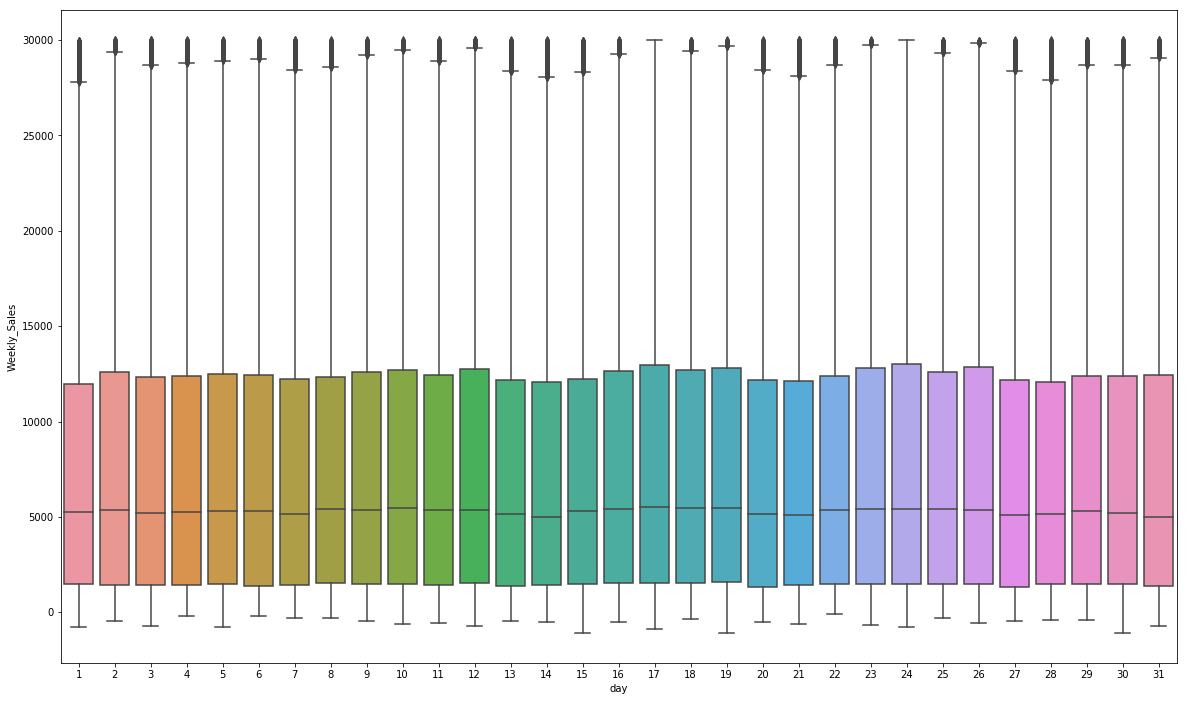

In [27]:
m,w = plt.subplots(1,1,figsize = (20,12)) # 1,1은 1x1로 즉 1개만 그린다, figsize=(20,12)는 밑그림크기
sns.boxplot(alldata2["day"],alldata2["Weekly_Sales"])

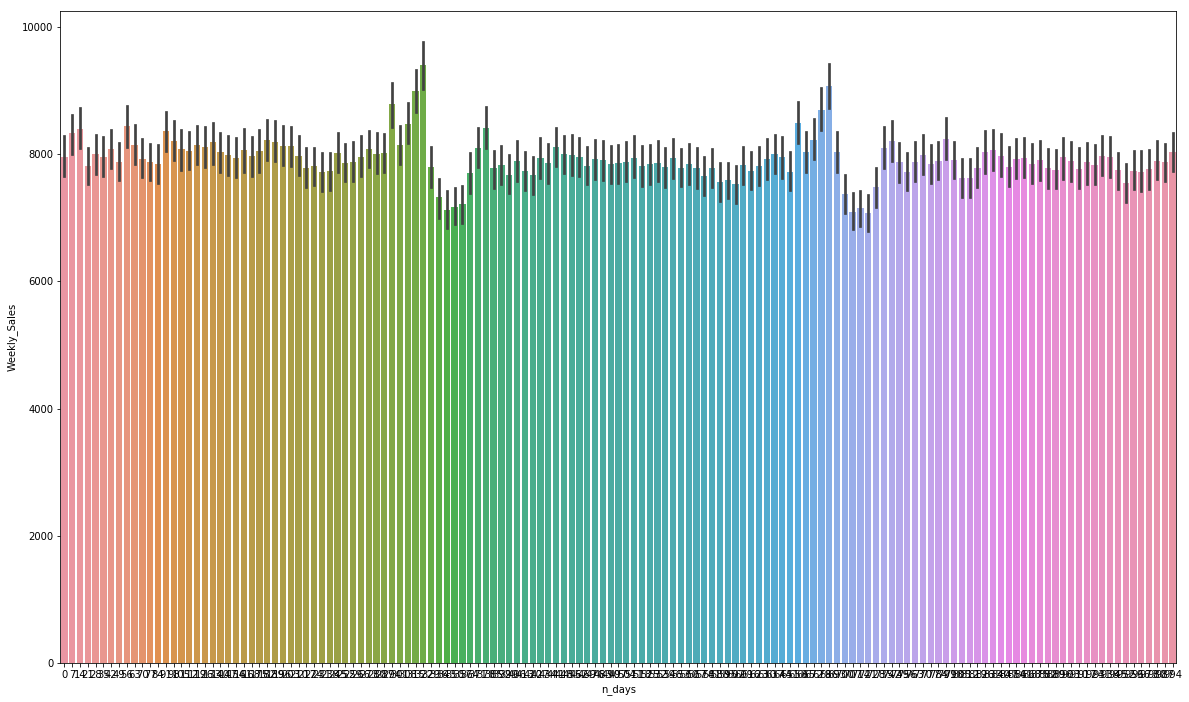

In [28]:
m,w = plt.subplots(1,1,figsize = (20,12)) # 1,1은 1x1로 즉 1개만 그린다, figsize=(20,12)는 밑그림크기
sns.barplot(alldata2["n_days"],alldata2["Weekly_Sales"])

In [29]:
pd.options.display.max_rows = 999

In [30]:
data = pd.DataFrame(alldata.Weekly_Sales.sort_values())

In [31]:
data.head(100)

,Weekly_Sales
16297,-1098.00
16295,-1098.00
16291,-1098.00
24830,-1008.96
35561,-898.00
6048,-863.00
93591,-798.00
193324,-798.00
93581,-798.00
93573,-798.00


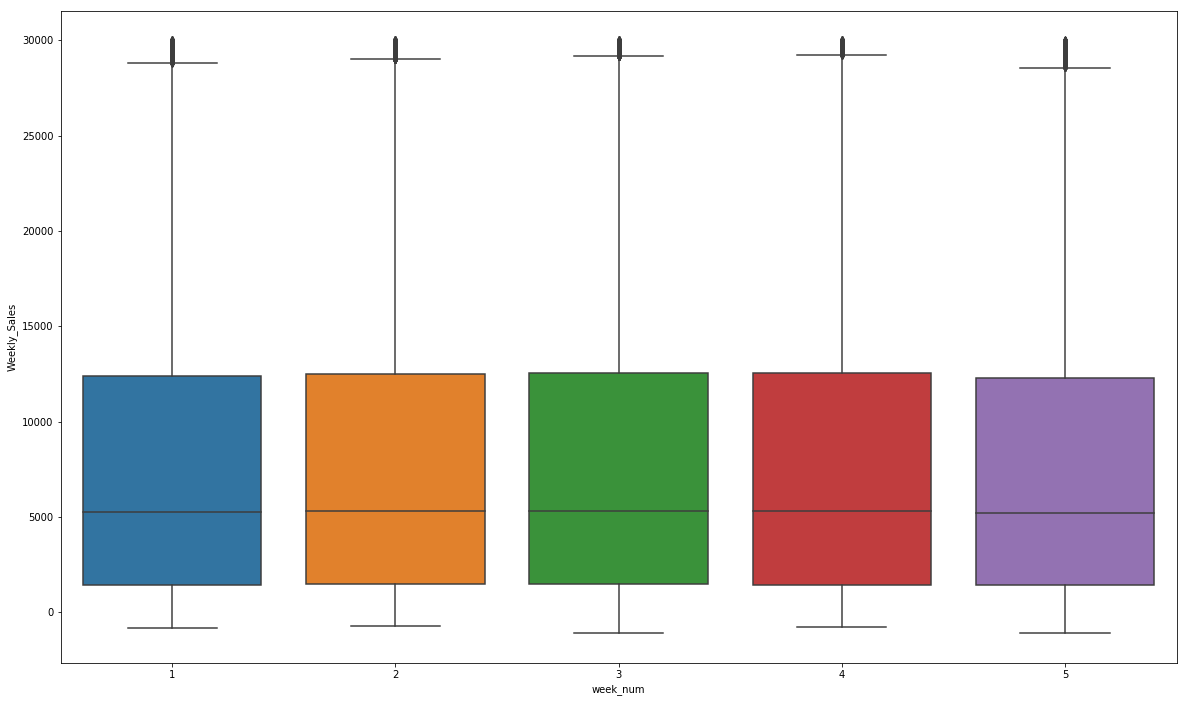

In [32]:
m,w = plt.subplots(1,1,figsize = (20,12)) # 1,1은 1x1로 즉 1개만 그린다, figsize=(20,12)는 밑그림크기
sns.boxplot(alldata2["week_num"],alldata2["Weekly_Sales"])

In [33]:
alldata.groupby("week_num").Weekly_Sales.mean()

week_num
1    16178.702220
2    16034.746866
3    15809.281812
4    16355.850502
5    15036.813423
Name: Weekly_Sales, dtype: float64

In [34]:
alldata.groupby("week_num").Weekly_Sales.median()

week_num
1    7672.930
2    7634.475
3    7607.230
4    7697.180
5    7287.640
Name: Weekly_Sales, dtype: float64

In [35]:
alldata.Weekly_Sales.min()

-1098.0

In [36]:
alldata.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month,day,n_days,Week,week_num
0,1,1,24924.50,False,A,151315,2010,2,5,0,5,1
1,1,1,46039.49,True,A,151315,2010,2,12,7,6,2
2,1,1,41595.55,False,A,151315,2010,2,19,14,7,3
3,1,1,19403.54,False,A,151315,2010,2,26,21,8,4
4,1,1,21827.90,False,A,151315,2010,3,5,28,9,1


In [37]:
alldata["Type"] = alldata["Type"].replace({"A" : 0, "B" : 1, "C" : 2})

In [38]:
alldata.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month,day,n_days,Week,week_num
0,1,1,24924.50,False,0,151315,2010,2,5,0,5,1
1,1,1,46039.49,True,0,151315,2010,2,12,7,6,2
2,1,1,41595.55,False,0,151315,2010,2,19,14,7,3
3,1,1,19403.54,False,0,151315,2010,2,26,21,8,4
4,1,1,21827.90,False,0,151315,2010,3,5,28,9,1


In [39]:
y = train["Weekly_Sales"]
alldata.drop(["Weekly_Sales"],1,inplace=True)

In [40]:
train = alldata[:len(train)]
test = alldata[len(train):]

In [41]:
train.head()

,Store,Dept,IsHoliday,Type,Size,year,month,day,n_days,Week,week_num
0,1,1,False,0,151315,2010,2,5,0,5,1
1,1,1,True,0,151315,2010,2,12,7,6,2
2,1,1,False,0,151315,2010,2,19,14,7,3
3,1,1,False,0,151315,2010,2,26,21,8,4
4,1,1,False,0,151315,2010,3,5,28,9,1


In [42]:
test.head()

,Store,Dept,IsHoliday,Type,Size,year,month,day,n_days,Week,week_num
421565,1,1,False,0,151315,2012,11,2,1001,44,1
421566,1,1,False,0,151315,2012,11,9,1008,45,2
421567,1,1,False,0,151315,2012,11,16,1015,46,3
421568,1,1,True,0,151315,2012,11,23,1022,47,4
421569,1,1,False,0,151315,2012,11,30,1029,48,5


In [43]:
test = test.reset_index(drop=True)

In [44]:
train.nunique()

Store         45
Dept          81
IsHoliday      2
Type           3
Size          40
year           3
month         12
day           31
n_days       143
Week          52
week_num       5
dtype: int64

In [45]:
np.log1p(y).sort_values()
# sort_values() 이걸하면 sorting해서 보여준다

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


46364    -inf
363381   -inf
383369   -inf
147914   -inf
110241   -inf
         ... 
418124    NaN
418130    NaN
419438    NaN
419596    NaN
419603    NaN
Name: Weekly_Sales, Length: 421565, dtype: float64

In [46]:
log_y = np.log1p(y+1098)

In [47]:
log_y.sort_values()

16297      0.000000
16295      0.000000
16291      0.000000
24830      4.500254
35561      5.303305
            ...    
135665    13.071973
337961    13.351985
95425     13.356800
338013    13.386064
95373     13.450513
Name: Weekly_Sales, Length: 421565, dtype: float64

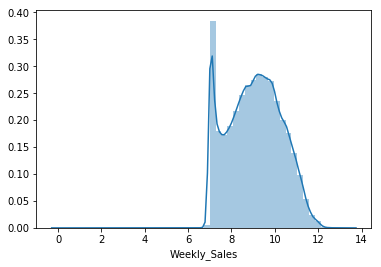

In [48]:
sns.distplot(log_y)
# 작은 값의 패널티보다 큰값의 패널티가 더 크기 떄문에 log가 효과가 좋은 경우가 많다

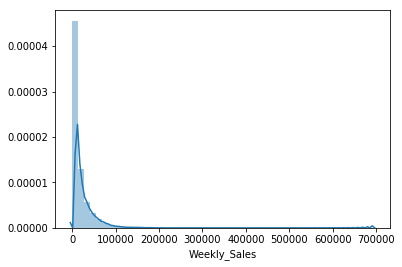

In [49]:
sns.distplot(y)

In [50]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(num_leaves = 8000, n_estimators=300, subsample=0.75, learning_rate=0.05, colsample_bytree=0.9)
lgb.fit(train, log_y)
preds_lgb = lgb.predict(test)

In [51]:
sample["Weekly_Sales"] = np.expm1(preds_lgb)-1098
sample.to_csv("final.csv", index=False)

NameError: name 'sample' is not defined